<a href="https://colab.research.google.com/github/Ldoun/tensorflow_study/blob/master/cnn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

케라스 창시자에게 배우는 딥러닝  5.2

In [ ]:
# API Token 다운받기
# 다운받은 API Token 업로드 하기
!pip install kaggle
from google.colab import files
files.upload()
# json 파일 옮겨주기

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# json 파일 제대로 업로드 됐는지 확인
!ls -1ha kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list
# 데이터셋 다운로드 받기 - 링크는 그 대회 'Data'에 있음
! kaggle competitions download -c dogs-vs-cats
# 다운로드 된 것들 다 보기 
!ls
# 필요하면 압축 풀기 
!unzip train.zip
!unzip test1.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: test1/5520.jpg          
  inflating: t

In [ ]:
import os,shutil
original_dataset_dir='/content/train'     #원본 파일 위치한 곳
base_dir='/content/cats_and_dogs_small'  #소규모 데이터셋 위치할 곳
os.mkdir(base_dir)

In [ ]:
train_dir=os.path.join(base_dir,'train') #이 함수 결과물 /content/cats_and_dogs_small/train
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'val')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,"test")
os.mkdir(test_dir)  

In [ ]:
train_cats_dir=os.path.join(train_dir,'cats') #훈련용 고양ㅇ
os.mkdir(train_cats_dir)

In [ ]:
train_dogs_dir=os.path.join(train_dir,'dogs') #훈련용 강아지
os.mkdir(train_dogs_dir)

In [ ]:
validation_cats_dir=os.path.join(validation_dir,'cats') #검증용 고양ㅇ
os.mkdir(validation_cats_dir)

In [ ]:
validation_dogs_dir=os.path.join(validation_dir,'dogs') #검증용 강아지
os.mkdir(validation_dogs_dir)

In [ ]:
test_cats_dir=os.path.join(test_dir,'cats') #시험용 고양이
os.mkdir(test_cats_dir)

In [ ]:
test_dogs_dir=os.path.join(test_dir,'dogs') #시험용 강아지
os.mkdir(test_dogs_dir)

In [ ]:
original_dataset_dir='/content/train' 
fnames=["cat.{}.jpg".format(i) for i in range(1000)]  #1000개 train_cats_dir로 복사
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
fnames=["cat.{}.jpg".format(i) for i in range(1000,1500)]  #500개 validation_cats_dir로 복사
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
fnames=["cat.{}.jpg".format(i) for i in range(1500,2000)] #500개 train_cats_dir로 복사
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(test_cats_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
fnames=["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
fnames=["dog.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
fnames=["dog.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(test_cats_dir,fname)
  shutil.copyfile(src,dst)

In [ ]:
print("훈련용 고양이 이미지 개수:",len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 개수: 1000


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))  #필터수 32개 사이즈 3,3 입력은 150*150 컬러이미지
model.add(layers.MaxPooling2D((2,2))) #2,2창으로 맥스풀링
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten()) #Dense layer에 들어갈 수 있게 1차원으로 펴줌
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid')) #이진 분류 문제이므로 시그모이드 함수로 0~1값으로 표현

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras import optimizers     #tensorflow 2.0의 경우 fromm keras import optimizers는 오류남
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)  #모든 이미지를 1/255로 스케일을 조정

train_generator=train_datagen.flow_from_directory(  
    train_dir,
    target_size=(150,150),  #이미지 사이즈 150*150으로 변경
    batch_size=20,  #한번에 20개 리턴
    class_mode='binary')  #이진분류이므로 BINARY

validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history=model.fit(  #2.0의 경우 fit도 제너레이터 사용가능
    train_generator,#steps_per_epoch의 경우 자동으로 지정 이건 한번에 ephocs에 몇개의 batch를 줄건지를 결정
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)  #

Epoch 1/30
100/100 [==============================] - 11s 110ms/step - loss: 0.6872 - acc: 0.5415 - val_loss: 0.7379 - val_acc: 0.3500
Epoch 2/30
100/100 [==============================] - 11s 111ms/step - loss: 0.6605 - acc: 0.6075 - val_loss: 0.7615 - val_acc: 0.4130
Epoch 3/30
100/100 [==============================] - 11s 110ms/step - loss: 0.6194 - acc: 0.6610 - val_loss: 0.8414 - val_acc: 0.4130
Epoch 4/30
100/100 [==============================] - 11s 109ms/step - loss: 0.5734 - acc: 0.7000 - val_loss: 0.6564 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5429 - acc: 0.7255 - val_loss: 0.5999 - val_acc: 0.7160
Epoch 6/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5142 - acc: 0.7430 - val_loss: 0.8197 - val_acc: 0.5720
Epoch 7/30
100/100 [==============================] - 11s 111ms/step - loss: 0.4727 - acc: 0.7830 - val_loss: 1.2257 - val_acc: 0.3470
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
model.save('cats_and_dogs_small_1.h5') #저장을 생활화하자!

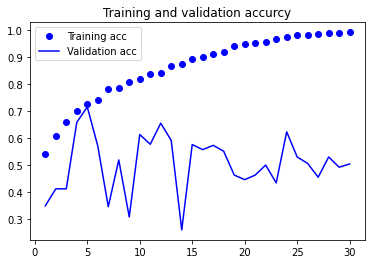

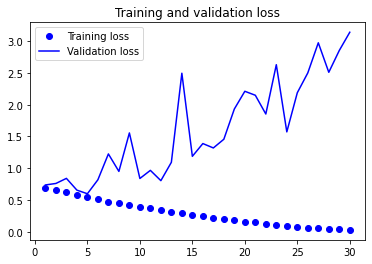

In [ ]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accurcy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()